# Rigid Polymer



In [3]:
import numpy as np
import matplotlib.pyplot as plt


Enter the rigidity parameter for the polymer as a floating point number: 
0
Enter the number of bonds in your polymer of interest as an Integer: 
0
Let one bond be approzimated as 1 angstrom
Shown below is a plot of the mean span of a 1000 link polymer 
 as a function of polymer rigidity


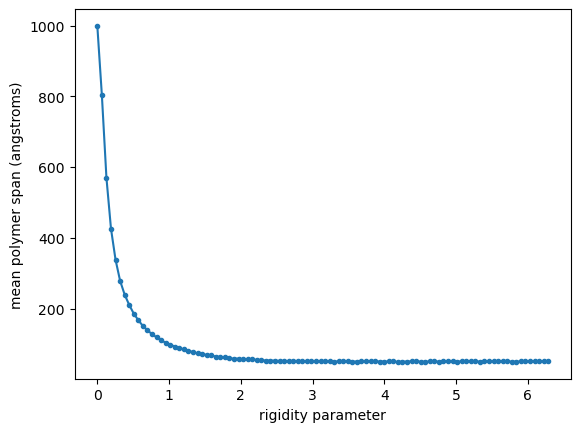

In [51]:
f = float(input("Enter the rigidity parameter for the polymer as a floating point number: \n"))
# insert try/catch for user entries.
nl = int(input("Enter the number of bonds in your polymer of interest as an Integer: \n"))

print("Let one bond be approzimated as 1 angstrom. \n")
print("Shown below is a plot of the mean span of a 1000 link polymer \nas a function of polymer rigidity")
def BuildPolymer(flex, nlinks):
    theta_i = np.random.normal(0., flex, nlinks)
    theta_i_abs = np.cumsum(theta_i)
    x_i = np.cumsum(np.cos(theta_i_abs))
    y_i = np.cumsum(np.sin(theta_i_abs))
    return x_i, y_i

def PlotPolymer(x_i, y_i):
    plt.plot(x_i, y_i, marker= ".", color = "r")
    plt.show()
    

def PolymerSpan(x_i, y_i):
    pwidth = np.amax(x_i)-np.amin(x_i)
    pheight = np.amax(y_i)-np.amin(y_i)
    span = np.sqrt(pwidth**2 + pheight**2)
#     print("Polymer span = ", span, " angstroms.\n")
    return span

# print("Ploymer width = ", pwidth, " angstroms.\n Polymer height = ", pheight, " angstroms.")


# There was an issue with calling BuildPolymer inside the for-loop that rreslted iun the same polymer every time.
# Calling each instruction individually cleared up the problem though, so I went with it.
def MeanPolymer(flex, nlinks):
    span_sum = 0
    for i in range(1000):
        theta_i = np.random.normal(0., flex, nlinks)
        theta_i_abs = np.cumsum(theta_i)
        x_i = np.cumsum(np.cos(theta_i_abs))
        y_i = np.cumsum(np.sin(theta_i_abs))

        span_sum += PolymerSpan(x_i, y_i)
    return span_sum/1000


# print(MeanPolymer(1, 1000))
        
var_flex = np.linspace(0., 2*np.pi, 100)
mean_arr = np.ones(100)
index=0
for i in var_flex:
    mean_arr[index] = MeanPolymer(var_flex[index], 1000)
    index +=1
    
# print(enumerate(var_flex))
    
# num_links_arr = 1000*np.ones(100)
# MeanPolymer(var_flex, num_links_arr)

plt.plot(var_flex, mean_arr, marker = ".")
plt.xlabel("rigidity parameter")
plt.ylabel("mean polymer span (angstroms)")
plt.show()
# BuildPolymer(flex, nlinks)
# PolymerSpan(flex, nlinks)

